In [5]:
# 이미지 컨투어
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from skimage.data import horse

rc('font', family='AppleGothic')
%matplotlib inline

img_raw = horse().astype('uint8')
img_raw = np.ones(img_raw.shape) - img_raw
img = img_raw.copy().astype('uint8')
mode = cv2.RETR_TREE                  #컨투어를 찾는 방법: 모든 컨투어 라인, 모든 상하구조
method = cv2.CHAIN_APPROX_TC89_KCOS   #컨투어 탐색시 근사화 방법: Teh_Chin 연결 근사 알고리즘 KCOS버전
img2, contours, hierachy = cv2.findContours(img, mode, method) 


In [6]:
len(contours)

2

In [7]:
contours[0].shape

(312, 1, 2)

In [8]:
np.squeeze(contours[0])[:5]

array([[350,   9],
       [346,  13],
       [345,  13],
       [339,  19],
       [330,  20]], dtype=int32)

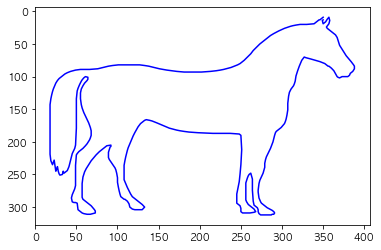

In [18]:
x0, y0 = zip(*np.squeeze(contours[0]))
plt.plot(x0, y0, c="b")
#plt.gca().invert_xaxis()
plt.gca().invert_yaxis()
plt.show()

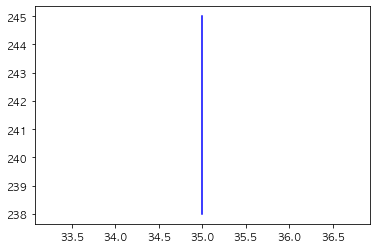

In [10]:
x0, y0 = zip(*np.squeeze(contours[1]))
plt.plot(x0, y0, c="b")
plt.show()

In [11]:
hierachy

array([[[-1, -1,  1, -1],
        [-1, -1, -1,  0]]], dtype=int32)

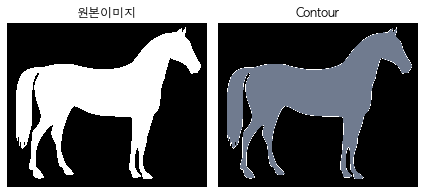

In [15]:
image = cv2.drawContours(img, contours, 
                         0, # contour line id 
                         2) # color
plt.subplot(1,2,1)
plt.imshow(img_raw, cmap='bone')
plt.title("원본이미지")
plt.axis("off")
plt.subplot(1,2,2)
plt.imshow(image, cmap='bone')
plt.title("Contour")
plt.axis("off")
plt.tight_layout()
plt.show()

In [19]:
### 컨투어 특징
# 이미지 모멘트
c0 = contours[0]
M = cv2.moments(c0)
M # {m: spatial, mu: central, nu: central normalized moments}

{'m00': 42355.0,
 'm10': 7943000.166666666,
 'm01': 6115675.833333333,
 'm20': 1914995009.1666665,
 'm11': 1043128904.8333333,
 'm02': 1041817606.0,
 'm30': 517465951777.85004,
 'm21': 233874687443.69998,
 'm12': 169430720481.3,
 'm03': 200904428563.85,
 'mu20': 425412866.6175771,
 'mu11': -103767899.87557864,
 'mu02': 158769774.61250484,
 'mu30': -1219318387.8395386,
 'mu21': -3713125246.697487,
 'mu12': 4020833974.2852783,
 'mu03': 4625649126.278534,
 'nu20': 0.2371380524771235,
 'nu11': -0.0578433790256196,
 'nu02': 0.08850309451896964,
 'nu30': -0.003302595676372647,
 'nu21': -0.010057218449154588,
 'nu12': 0.010890665663146169,
 'nu03': 0.012528843128440374}

In [20]:
cv2.contourArea(c0)  # 컨투어 면적 = 모멘트 m00

42355.0

In [21]:
x, y, w, h = cv2.boundingRect(c0)  #컨투어 바운딩 박스
x, y, w, h

(18, 9, 371, 304)

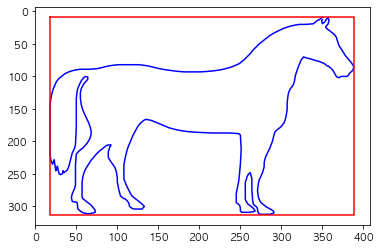

In [22]:
plt.plot(x0, y0, c='b')
plt.plot([x, x+w, x+w,   x, x], 
         [y, y  , y+h, y+h, y], c='r')
plt.gca().invert_yaxis()
plt.show()

In [23]:
aspect_ratio = float(w)/h
aspect_ratio

1.2203947368421053

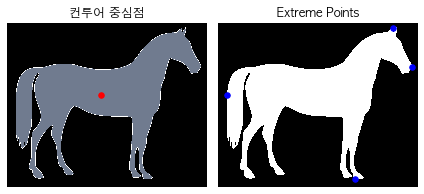

In [24]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])
leftmost  = tuple(c0[c0[:,:,0].argmin()][0])
rightmost = tuple(c0[c0[:,:,0].argmax()][0])
topmost    = tuple(c0[c0[:,:,1].argmin()][0])
bottommost = tuple(c0[c0[:,:,1].argmax()][0])

plt.subplot(1,2,1)
plt.imshow(image, cmap='bone')
plt.title("컨투어 중심점")
plt.axis("off")
plt.scatter([cx], [cy], c='r', s=30)

plt.subplot(1,2,2)
plt.imshow(img_raw, cmap='bone')
plt.title("Extreme Points")
plt.axis("off")
plt.scatter(
    [leftmost[0], rightmost[0], topmost[0], bottommost[0]],
    [leftmost[1], rightmost[1], topmost[1], bottommost[1]],
    c='b', s=30)
plt.tight_layout()
plt.show()

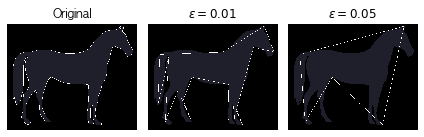

In [28]:
### 컨투어 추정
img1 = img_raw.copy().astype('uint8')
img2 = img_raw.copy().astype('uint8')
img3 = img_raw.copy().astype('uint8')

c0 = contours[0]

epsilon1 = 0.01*cv2.arcLength(c0, True)
epsilon2 = 0.05*cv2.arcLength(c0, True)

approx1 = cv2.approxPolyDP(c0, epsilon1, True)
approx2 = cv2.approxPolyDP(c0, epsilon2, True)

image1 = cv2.drawContours(img1, [c0], -1, 7)
image2 = cv2.drawContours(img2, [approx1], -1, 7)
image3 = cv2.drawContours(img3, [approx2], -1, 7)

titles = ['Original', '$\epsilon=0.01$', '$\epsilon=0.05$']
images = [image1, image2, image3]

for i in range(3):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i], cmap='bone')
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

In [30]:
### Convex Hull
cv2.isContourConvex(c0)

False

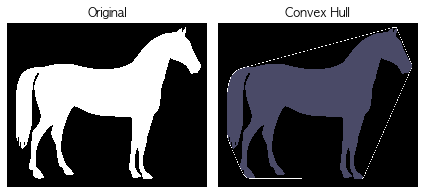

In [32]:
img4 = img_raw.copy().astype('uint8')

c0 = contours[0]
hull = cv2.convexHull(c0) # make contour convex when it doesn't
image4 = cv2.drawContours(img4, [hull], 0, 3)
titles = ['Original', 'Convex Hull']
images = [img_raw, image4]
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i], cmap='bone')
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()

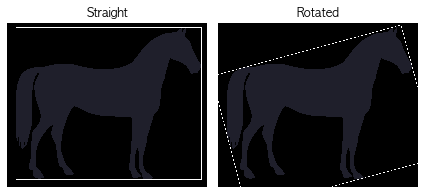

In [34]:
### Bounding Rectangle
img1 = img_raw.copy().astype('uint8')
img2 = img_raw.copy().astype('uint8')

# straight rectangle
x, y, w, h = cv2.boundingRect(c0)
img1 = cv2.rectangle(img1, (x,y), (x+w,y+h), 7)

# rotated rectangle
rect = cv2.minAreaRect(c0)
box = cv2.boxPoints(rect).astype('int')
img2 = cv2.drawContours(img2, [box], -1, 7)

titles = ['Straight', 'Rotated']
images = [img1, img2]
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i], cmap='bone')
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()


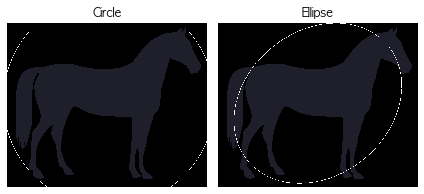

In [35]:
### Minimum Enclosing Circle & Fitting Ellipse
# 컨투어 라인을 완전히 포함하는 가장 작은 원과 타원 
img3 = img_raw.copy().astype('uint8')
img4 = img_raw.copy().astype('uint8')

(x,y), radius = cv2.minEnclosingCircle(c0)
center = int(x), int(y)
radius = int(radius)
img3 = cv2.circle(img3, center, radius, 7)

ellipse = cv2.fitEllipse(c0)
img4 = cv2.ellipse(img4, ellipse, 7)

titles = ['Circle', 'Ellipse']
images = [img3, img4]
for i in range(2):
    plt.subplot(1,2,i+1)
    plt.imshow(images[i], cmap='bone')
    plt.title(titles[i])
    plt.axis("off")
plt.tight_layout()
plt.show()